In [24]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import pandas as pd
import io

def img2string(img_path, is_query=False):
    img = Image.open(img_path)
    # Resize
    basewidth = 224
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    
    img_buffer = io.BytesIO()
    img.save(img_buffer, format="PNG")
    imgStr = base64.b64encode(img_buffer.getvalue())
    return '<img src="data:image/png;base64,{0:s}">'.format(imgStr.decode())


def display_samples(df):
    data = pd.DataFrame()
    index=0
    for _, s in df.iterrows():
        img = img2string('../annotations/'+s['img_path'])
        
        
        if s['img_label'] or s['txt']:
            label = 'Relevant'
        else:
            label = 'Irrelevant'
        
        data.loc[f"S-{index}", 'GT'] = label
#         data.loc[f"S-{index}", 'GT'] = 'Relevant' if s['tweet_label'] else 'Irrelevant'
        data.loc[f"S-{index}", 'Img'] = img
        data.loc[f"S-{index}", 'Text'] = s['text']
        index +=1

    data = data.T
    display(HTML('<h1>Samples</h1>'))
    html_all = data.to_html(escape=False)
    display(HTML(html_all))

In [94]:
df_degree = pd.read_csv('LeidenMCICat.csv')

In [95]:
df = df_degree[20:30]

In [96]:
df_train = pd.read_pickle('../clip-training/train.pkl')

In [97]:
df_degree_full = df_train[df_train['tweet_id'].isin(df['tweet_id'])]

In [98]:
df_degree_full

,tweet_id,work_time,orig_path,text,img_path,img_label,txt
16,1435161143287373824,15.081557,social-data/media_07/en/1435161143287373828/im...,@SkyNews Blackford lying again. The SNP raise...,annotated-data/1435161143287373828.jpg,False,False
397,1436055995709632512,73.099576,social-data/media_8_11/pt/1436055995709632519/...,O noivado da Tuğçe e do Bora é o mais novo aci...,annotated-data/1436055995709632519.jpg,False,False
723,1444338153981108224,28.331207,social-data/media_2oct/pt/1444338153981108227/...,"pela via do sincretismo, a irmandade mítico-an...",annotated-data/1444338153981108227.png,False,False
1006,1436026301882716160,17.324046,social-data/media_8_11/pt/1436026301882716167/...,Vocês pediram e a 'Universal Store' obedeceu! ...,annotated-data/1436026301882716167.jpg,False,False
1249,1435656805602971648,16.222154,social-data/media_8_11/pt/1435656805602971648/...,#GiroNosTrends LANA IS COMING e ARCADIA IS COM...,annotated-data/1435656805602971648.jpg,False,False
1335,1437114623761784832,30.197167,social-data/media_12/pt/1437114623761784841/im...,#news James Middleton (irmão mais novo de Cath...,annotated-data/1437114623761784841.jpg,False,False
1455,1435161666891698176,18.184926,social-data/media_07/en/1435161666891698176/im...,📣 #Live Event Highlights from FINNOVEX Middle ...,annotated-data/1435161666891698176.jpg,False,False
1595,1435299940146814976,27.967424,social-data/media_07/pt/1435299940146814982/im...,A Orange Army do Verstappen tem mais gente que...,annotated-data/1435299940146814982.jpg,False,True
1864,1436037856217141248,24.010533,social-data/media_8_11/en/1436037856217141249/...,News: Entertainment Weekly gave us a first lo...,annotated-data/1436037856217141249.jpg,False,False
2266,1435680539936165888,16.881113,social-data/media_8_11/pt/1435680539936165888/...,@MariliaMReal Assiste o musical novo da Cinder...,annotated-data/1435680539936165888.jpg,False,False


,S-0,S-1,S-2,S-3,S-4,S-5,S-6,S-7,S-8,S-9
GT,Irrelevant,Irrelevant,Irrelevant,Irrelevant,Irrelevant,Irrelevant,Irrelevant,Relevant,Irrelevant,Irrelevant
Img,,,,,,,,,,
Text,"@SkyNews Blackford lying again. The SNP raised income tax in Scotland despite promising not to in their manifesto. Where’s the £2.7 billion missing covid money? We’ll take no lectures from that greedy hypocrite, his expenses during two major lockdowns 👇🏻 https://t.co/T2RhHmTzyL",O noivado da Tuğçe e do Bora é o mais novo acidente da Ada com perda de memória kkkkk quando vai ver a Tuğçe só foi na casa do Bora conversar com ele e a mãe https://t.co/GwuHWpMCjc,"pela via do sincretismo, a irmandade mítico-ancestral entre Ogun e Oxossi. No mito, Ogum e quem ensinou Oxóssi a caçar, como seu irmão mais novo; na história do samba. https://t.co/6biBoRyFAp",Vocês pediram e a 'Universal Store' obedeceu! Todas as versões do novo disco de Lana Del Rey (menos as exclusivas das lojas internacionais) estão disponíveis em tiragem nacional! Vem conferir: https://t.co/hUIV1qCV6e https://t.co/6Op3NYezcy,"#GiroNosTrends LANA IS COMING e ARCADIA IS COMING estão nos assuntos mais comentados do Twitter porque a cantora Lana Del Rey acaba de lançar o single ""Arcadia"" e seus fãs estão super animados! Ah, e dia 22 de outubro chega o álbum novo, Blue Banisters! https://t.co/64Jmvs0LIm","#news James Middleton (irmão mais novo de Catherine) casou-se com Alizee Thevenet ontem na França. Os Duques de Cambridge e os filhos estavam presentes, ansiosa para ver novas fotos. https://t.co/722mNJAbRq",📣 #Live Event Highlights from FINNOVEX Middle East! 🟠 The Opening KeyNote by Frederic de Melker || Managing Director - Personal Banking at RAKBANK UAE (@RAKBANKlive our Lead Sponsor) Join him as he highlights the benefits and pitfalls of Digital Transformation! https://t.co/9nVz7ZeY2L,A Orange Army do Verstappen tem mais gente que os apoiadores do bonoro #flopou e muito https://t.co/nEwBEQgokZ,"News: Entertainment Weekly gave us a first look at ""Don't Look Up"", including Meryl Streep's President Janie Orlean Fotos exclusivas da atriz Meryl Streep's President Janie Orlean em seu novo filme ""Don't Look Up"", https://t.co/HgThXZ7k8C https://t.co/Vea43pUlWo",@MariliaMReal Assiste o musical novo da Cinderella com a Camila Cabello https://t.co/Vm2sVOcG6F

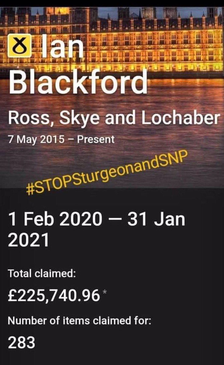
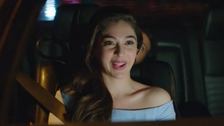
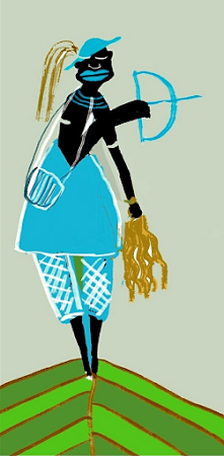
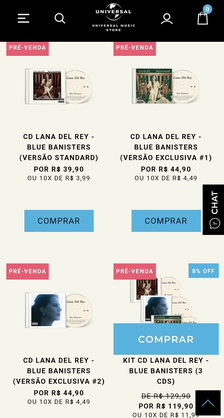
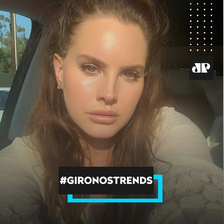
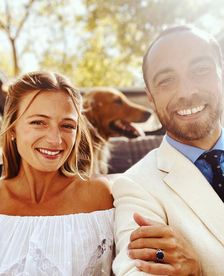
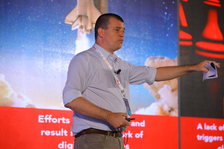
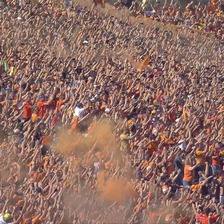
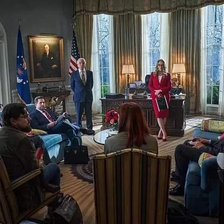
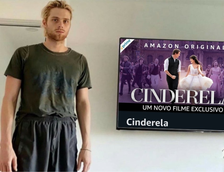

In [99]:
display_samples(df_degree_full)